In [1]:
# first we need to import the libraries we're going to use
# 'import x as y' will import package x but give it the alias 'y' so you don't have to type out x all the time

import matplotlib.pyplot as plt # for making nice plots
import pandas as pd # for handling and transforming the data
import datetime # for manipulating dates, timestamps etc

%matplotlib inline

In [27]:
# we'll be using this file from now on! It's been through the process of cleaning and preparing
df = pd.read_csv("../data/cleaned.csv")

In [3]:
# want to get a feel for distributions of features and possible relationships

# to learn from this section: what features we may want to engineer in the next section
# e.g. bimodal - split in two bins

### Removing unrelated columns

In [4]:
# we know ahead of time that there are some columns that definitely won't be useful for classification
# these are the reference number, and probably the coordinates (latitude and longitude)
# we can drop these now

df = df.drop(columns=['latitude', 'longitude', 'reference_num'])
df.head(5)

,num_vehicles,accident_date,accident_time,road_class,road_surface,lighting,weather,casualty_class,casualty_severity,casualty_sex,casualty_age,vehicle_type
0,2,14-Mar-09,2330,Unclassified,Dry,Darkness: no street lighting,Fine with high winds,Driver/Rider,Slight,Male,30,Car
1,2,14-Mar-09,2330,Unclassified,Dry,Darkness: no street lighting,Fine with high winds,Driver/Rider,Slight,Female,20,Car
2,1,03-Oct-09,630,A(M),Dry,Darkness: no street lighting,Fine with high winds,Driver/Rider,Slight,Male,29,Car
3,4,19-Nov-09,630,A(M),Dry,Darkness: no street lighting,Fine with high winds,Driver/Rider,Slight,Male,17,Car
4,4,19-Nov-09,630,A(M),Dry,Darkness: no street lighting,Fine with high winds,Driver/Rider,Slight,Male,53,Goods vehicle 3.5 tonnes mgw and under


In [5]:
# we have a range of different columns left
# some are numerical, some are date/time-related, some are categorical, and some are binary

### Exploring binary columns

In [29]:
df.groupby('casualty_severity').size()

casualty_severity
Serious     2192
Slight     16691
dtype: int64

In [6]:
# let's look at a binary column - casualty sex. Does it matter? What can we tell from this data?

df.groupby(['casualty_severity', 'casualty_sex']).size()

# hint: men are the casualty in 58% of slight accidents but 70% of serious accidents
# this could be useful information! But we need to encode the binary column to 0 and 1, instead of string labels.

casualty_severity  casualty_sex
Serious            Female           655
                   Male            1537
Slight             Female          7038
                   Male            9653
dtype: int64

In [7]:
# encoding binary columns - there are two columns that can only have two values
# this means we can encode these as 0 and 1, instead of using string labels

binaryColumns = ['casualty_sex', 'casualty_severity']

# this function will return 1 if the value matches the specified 'positive' value
# e.g. encodeBinary('Male', 'Female') = 0, encodeBinary('Serious', 'Serious') = 1
def encodeBinary(positiveValue, value):
    return int(value == positiveValue)

# applying this function to our dataframe
df['is_male'] = [encodeBinary('Male', s) for s in df.casualty_sex]
df['is_serious'] = [encodeBinary('Serious', s) for s in df.casualty_severity]

# we can drop the old columns, now we have the binary versions
df = df.drop(columns = ['casualty_severity', 'casualty_sex'])

In [8]:
df.head(5)

,num_vehicles,accident_date,accident_time,road_class,road_surface,lighting,weather,casualty_class,casualty_age,vehicle_type,is_male,is_serious
0,2,14-Mar-09,2330,Unclassified,Dry,Darkness: no street lighting,Fine with high winds,Driver/Rider,30,Car,1,0
1,2,14-Mar-09,2330,Unclassified,Dry,Darkness: no street lighting,Fine with high winds,Driver/Rider,20,Car,0,0
2,1,03-Oct-09,630,A(M),Dry,Darkness: no street lighting,Fine with high winds,Driver/Rider,29,Car,1,0
3,4,19-Nov-09,630,A(M),Dry,Darkness: no street lighting,Fine with high winds,Driver/Rider,17,Car,1,0
4,4,19-Nov-09,630,A(M),Dry,Darkness: no street lighting,Fine with high winds,Driver/Rider,53,Goods vehicle 3.5 tonnes mgw and under,1,0


### Part 2c - exploring numerical and datetime columns

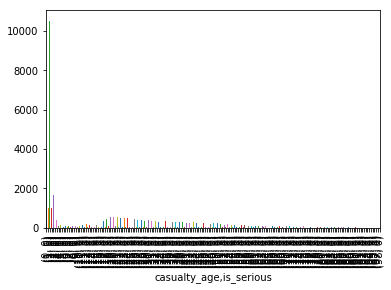

In [10]:
# numerical columns - are they useful? Do we want to do anything with them?

numericalColumns = ['num_vehicles', 'casualty_age']

for numCol in numericalColumns:
    grouped = df.groupby([numCol, 'is_serious']).size()
    grouped.plot.bar()

In [11]:
# let's explore the date and time fields
# in their current format, they aren't very useful - we want to extract useful columns

monthMap = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 
            'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}

# write a function to take a date string of format DD-Mon-YY and extract the month as an integer
def getMonth(s):
    return monthMap[s.split('-')[1]]

# write a function to take a date string of format DD-Mon-YY and extract the full year as an integer
def getYear(s):
    return 2000 + int(s.split('-')[2])

# use these functions to add new columns to our dataframe
df['month'] = [getMonth(s) for s in df['accident_date']]
df['year'] = [getYear(s) for s in df['accident_date']]
df = df.drop(columns=['accident_date'])

df.head(5)

,num_vehicles,accident_time,road_class,road_surface,lighting,weather,casualty_class,casualty_age,vehicle_type,is_male,is_serious,month,year
0,2,2330,Unclassified,Dry,Darkness: no street lighting,Fine with high winds,Driver/Rider,30,Car,1,0,3,2009
1,2,2330,Unclassified,Dry,Darkness: no street lighting,Fine with high winds,Driver/Rider,20,Car,0,0,3,2009
2,1,630,A(M),Dry,Darkness: no street lighting,Fine with high winds,Driver/Rider,29,Car,1,0,10,2009
3,4,630,A(M),Dry,Darkness: no street lighting,Fine with high winds,Driver/Rider,17,Car,1,0,11,2009
4,4,630,A(M),Dry,Darkness: no street lighting,Fine with high winds,Driver/Rider,53,Goods vehicle 3.5 tonnes mgw and under,1,0,11,2009


In [12]:
# does the year matter? let's have a look at the distribution of slight vs serious cases by year

years = set(df.year.values)
x = []
y = []

for year in years:
    subDf = df[df.year == year]
    numSlight = len(subDf[subDf.casualty_severity == 'Slight'])
    numSerious = len(subDf[subDf.casualty_severity == 'Serious'])
    frac = numSerious/numSlight
    x.append(year)
    y.append(frac)

AttributeError: 'DataFrame' object has no attribute 'casualty_severity'

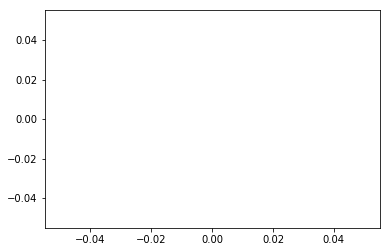

In [13]:
plt.scatter(x,y)

# loose linear relationship but probably not enough to be useful
# will drop year column

df = df.drop(columns = ['year'])

In [14]:
# write a function to take a 24hr HHMM time and get the hour as an int
# e.g. 1730 -> 17, 930 -> 9
# warning: leading zeros have been truncated, so 12.30am == 30
def getHour(n):
    s = str(n)
    if len(s) == 3:
        return int(s[0])
    elif len(s) == 2:
        return 0
    else:
        return int(s[0:2])

### Exploring categorical columns

In [16]:
# categorical columns

In [17]:
colsToExplore = ['num_vehicles', 'road_class', 'casualty_sex', 'road_surface']

for colte in colsToExplore:
    results = df.groupby([colte, 'casualty_severity'])[colte].agg(['count'])
    results.plot.bar(stacked=True)

KeyError: 'casualty_severity'

In [18]:
# creating better features from existing ones (e.g. weekend vs weekday, day bins)

# some features are useful but not in their current state

In [19]:
# functions to get new features

monthMap = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 
            'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}

# write a function to take a date string of format DD-Mon-YY and extract the month as an integer
def getMonth(s):
    return s.split('-')[1]

# write a function to take a date string of format DD-Mon-YY and extract the full year as an integer
def getYear(s):
    return 2000 + int(s.split('-')[2])

# write a function to take a 24hr HHMM time and get the hour as an int
# e.g. 1730 -> 17, 930 -> 9
# warning: leading zeros have been truncated, so 12.30am == 30
def getHour(n):
    s = str(n)
    if len(s) == 3:
        return int(s[0])
    elif len(s) == 2:
        return 0
    else:
        return int(s[0:2])

# use these functions to add new columns to our dataframe
df['month'] = [getMonth(s) for s in df['accident_date']]
df['year'] = [getYear(s) for s in df['accident_date']]
df['hour'] = [getHour(n) for n in df['accident_time']]

KeyError: 'accident_date'

In [20]:
colName = 'month'
monthOrder = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
results = df.groupby(colName)[colName].agg(['count']).loc[monthOrder]
results.plot.bar()

KeyError: "None of [['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']] are in the [index]"

In [21]:
colName = 'hour'
results = df.groupby(colName).size()
results.plot.bar()

KeyError: 'hour'

In [22]:


monthMap = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}
dayMap = {1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat', 7: 'Sun'}

def getWeekday(s):
    month = monthMap[getMonth(s)]
    year = getYear(s)
    date = int(s.split('-')[0])
    dt = datetime.datetime(year, month, date)
    return dayMap[dt.isoweekday()]

df['weekday'] = [getWeekday(s) for s in df['accident_date']]

KeyError: 'accident_date'

In [23]:
colName = 'weekday'
dayOrder = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
results = df.groupby(colName)[colName].agg(['count']).loc[dayOrder]
results.plot.bar()

KeyError: 'weekday'

In [24]:
# encoding categorical data

# some features are categorical and we need to encode this = one hot encoding!